In [53]:
import os
from collections  import defaultdict
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def load_from_pickle(file_path):
    """
    Load data from a pickle file.

    Parameters:
    - file_path: The path to the pickle file.

    Returns:
    - loaded_data: The loaded data.
    """
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
    # print(f'Data has been loaded from {file_path}')
    return loaded_data

In [54]:
for problem in [
                # 'MaxCover',
                'MaxCut',
                # 'IM'
              ]:
    root_folder=os.path.join(problem,'data')
    # datasets=['Facebook','DBLP','Skitter','YouTube']
    
    datasets=os.listdir(root_folder)
    print(datasets)

    for dataset in datasets:
        

        

        print('*'*20)
        print(dataset)
        dataset_path = os.path.join(root_folder,dataset)
        algorthims = os.listdir(dataset_path)

        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df = defaultdict(list)
        # for algorthim in ['Quickfilter','SS','LeNSE','CombHelperTeacher','CombHelperStudent','GNNpruner']:
        for algorthim in ['Quickfilter','SS','LeNSE','CombHelperStudent','GNNpruner']:
          try:
            df_ = load_from_pickle(os.path.join(dataset_path,algorthim))

            # columns =['Ground set(Pruned)','Ratio(%)','Queries(%)']
            df['algorithm'].append(algorthim)
            df['Size of Ground Set'].append(df_['Pruned Ground set(%)'].iloc[0])
            df['Ratio'].append(df_['Ratio(%)'].iloc[0])
            # df['Objective Value(Unpruned)'].append(df_['Objective Value(Unpruned)'].iloc[0])
            # df['Objective Value(Pruned)'].append(df_['Objective Value(Pruned)'].iloc[0])
            # df['Queries'].append(df_['Queries(%)'].iloc[0].zfill(4))
            # df['Queries'].append(df_['Queries(%)'].iloc[0])
          except:
            pass
      # print(df)
        df = pd.DataFrame(df)
        # df['Queries'] = df['Queries'].apply(lambda x: f"{x:.4f}")
        df['Size of Ground Set']=df['Size of Ground Set'].round(4)
        # df['Queries'] = df['Queries'].round(4)
        print(df)
        print('-'*20)


['Slashdot', 'YouTube', 'web-Google', 'Deezer', 'DBLP', 'Facebook', 'Twitter', 'Wiki']
********************
Slashdot
           algorithm  Size of Ground Set   Ratio
0        Quickfilter                0.67   99.60
1                 SS                1.11   99.59
2  CombHelperStudent                1.25  100.76
3          GNNpruner                2.03   99.93
--------------------
********************
YouTube
           algorithm  Size of Ground Set   Ratio
0        Quickfilter                0.02   99.98
1                 SS                0.13   98.46
2  CombHelperStudent                2.95   99.92
3          GNNpruner                0.34  100.18
--------------------
********************
web-Google
           algorithm  Size of Ground Set  Ratio
0  CombHelperStudent                4.12  98.55
--------------------
********************
Deezer
           algorithm  Size of Ground Set   Ratio
0        Quickfilter                2.66   98.80
1                 SS                1.45  102.6

In [3]:
df_

,Dataset,Budget,Objective Value(Unpruned),Objective Value(Pruned),Ground Set,Ground set(Pruned),Queries(Unpruned),Time(Unpruned),Time(Pruned),Queries(Pruned),Pruned Ground set(%),Ratio(%),Queries(%),TimeRatio,TimeToPrune
0,Wiki,100,4644,4644,7115,570,706550,0.0519,0.025,52050,8.01,100.0,7.37,0.481696,0.016972


knapsack_multi Slashdot
knapsack_multi YouTube
knapsack_multi Deezer
knapsack_multi Skitter
knapsack_multi DBLP
knapsack_multi Facebook
knapsack_multi Twitter
knapsack_multi Wiki


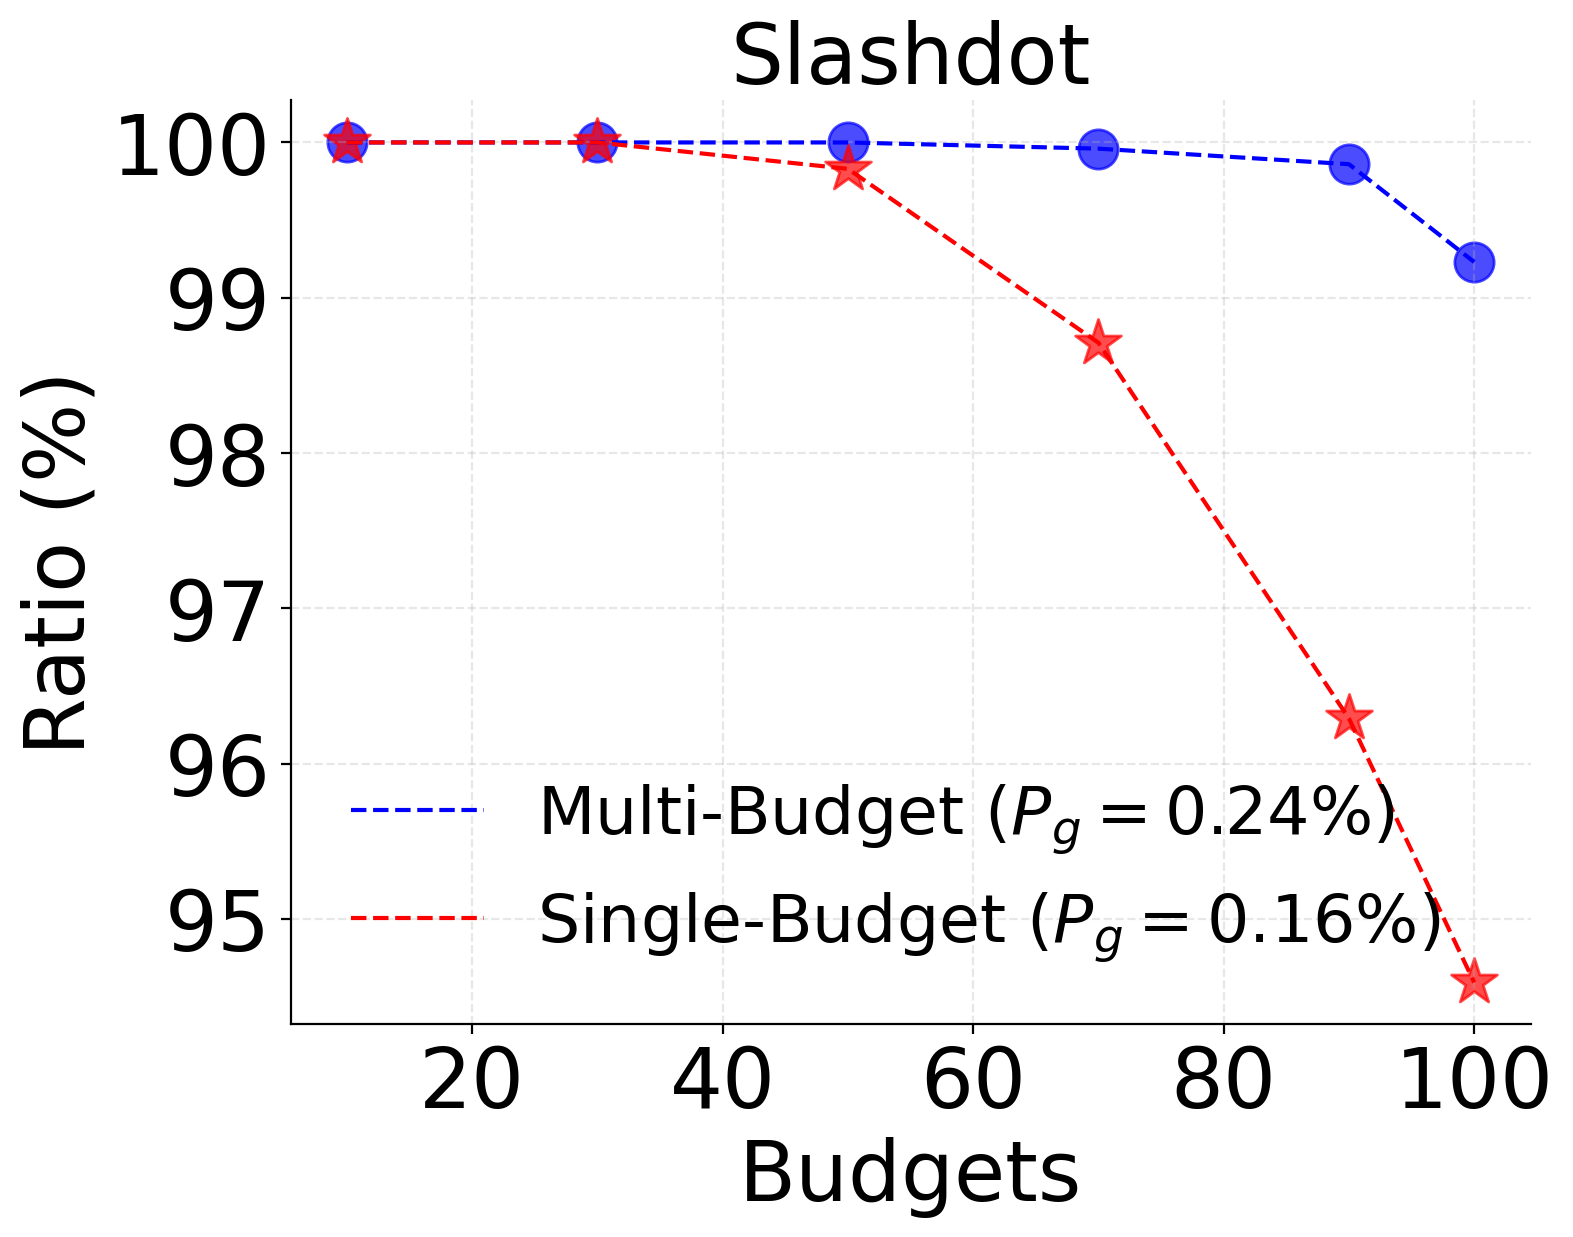

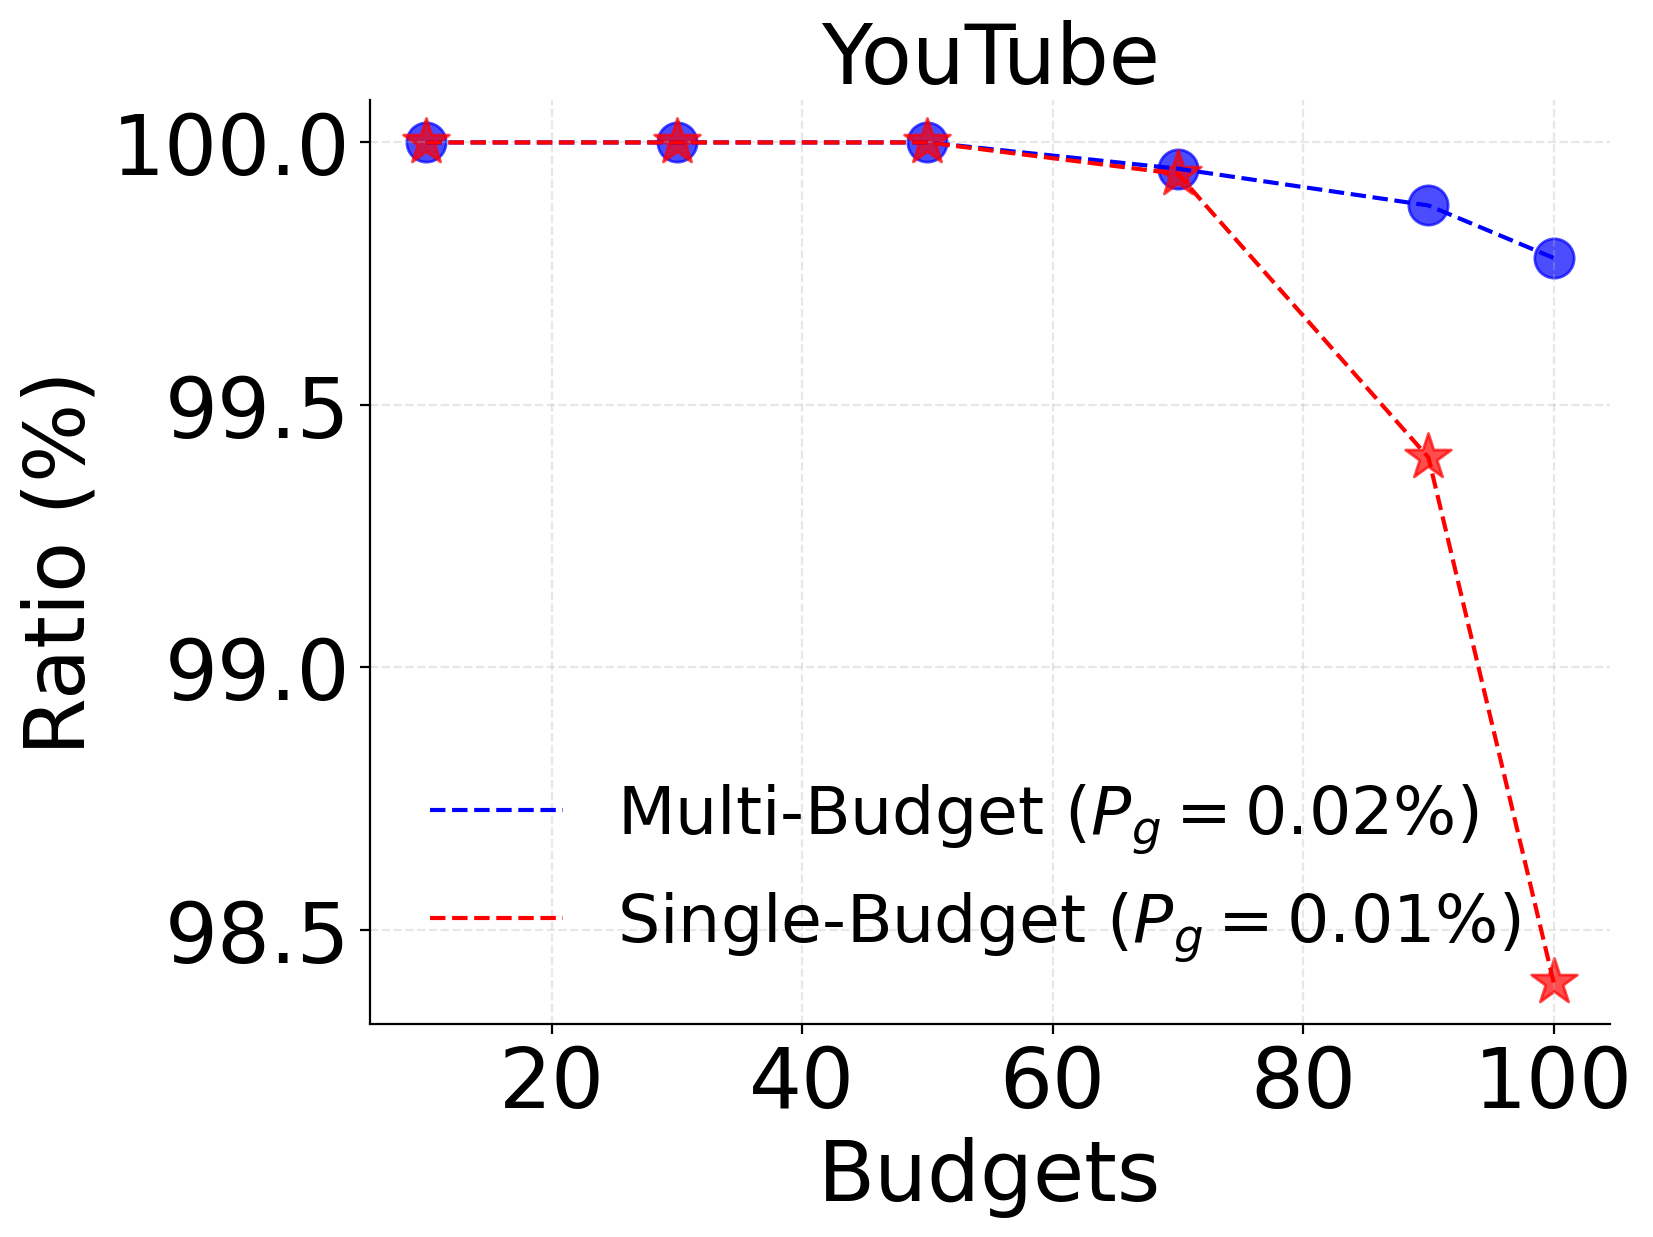

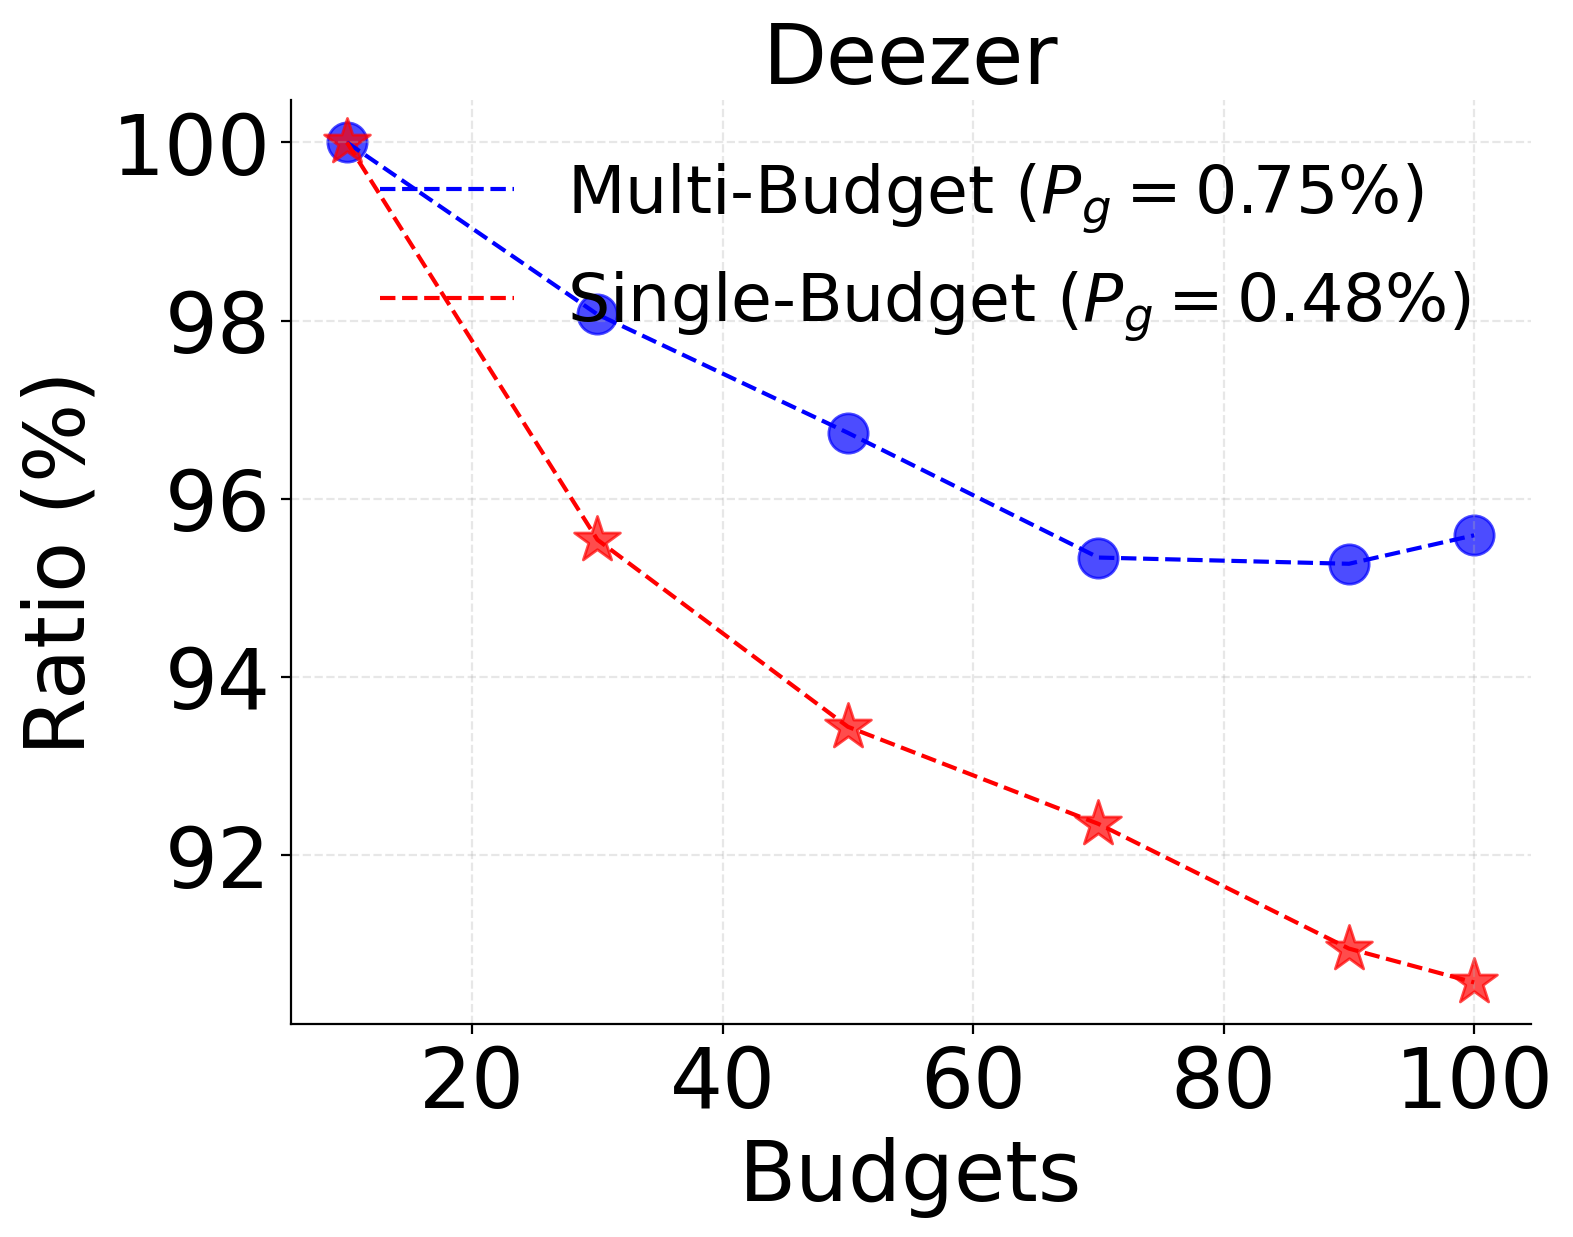

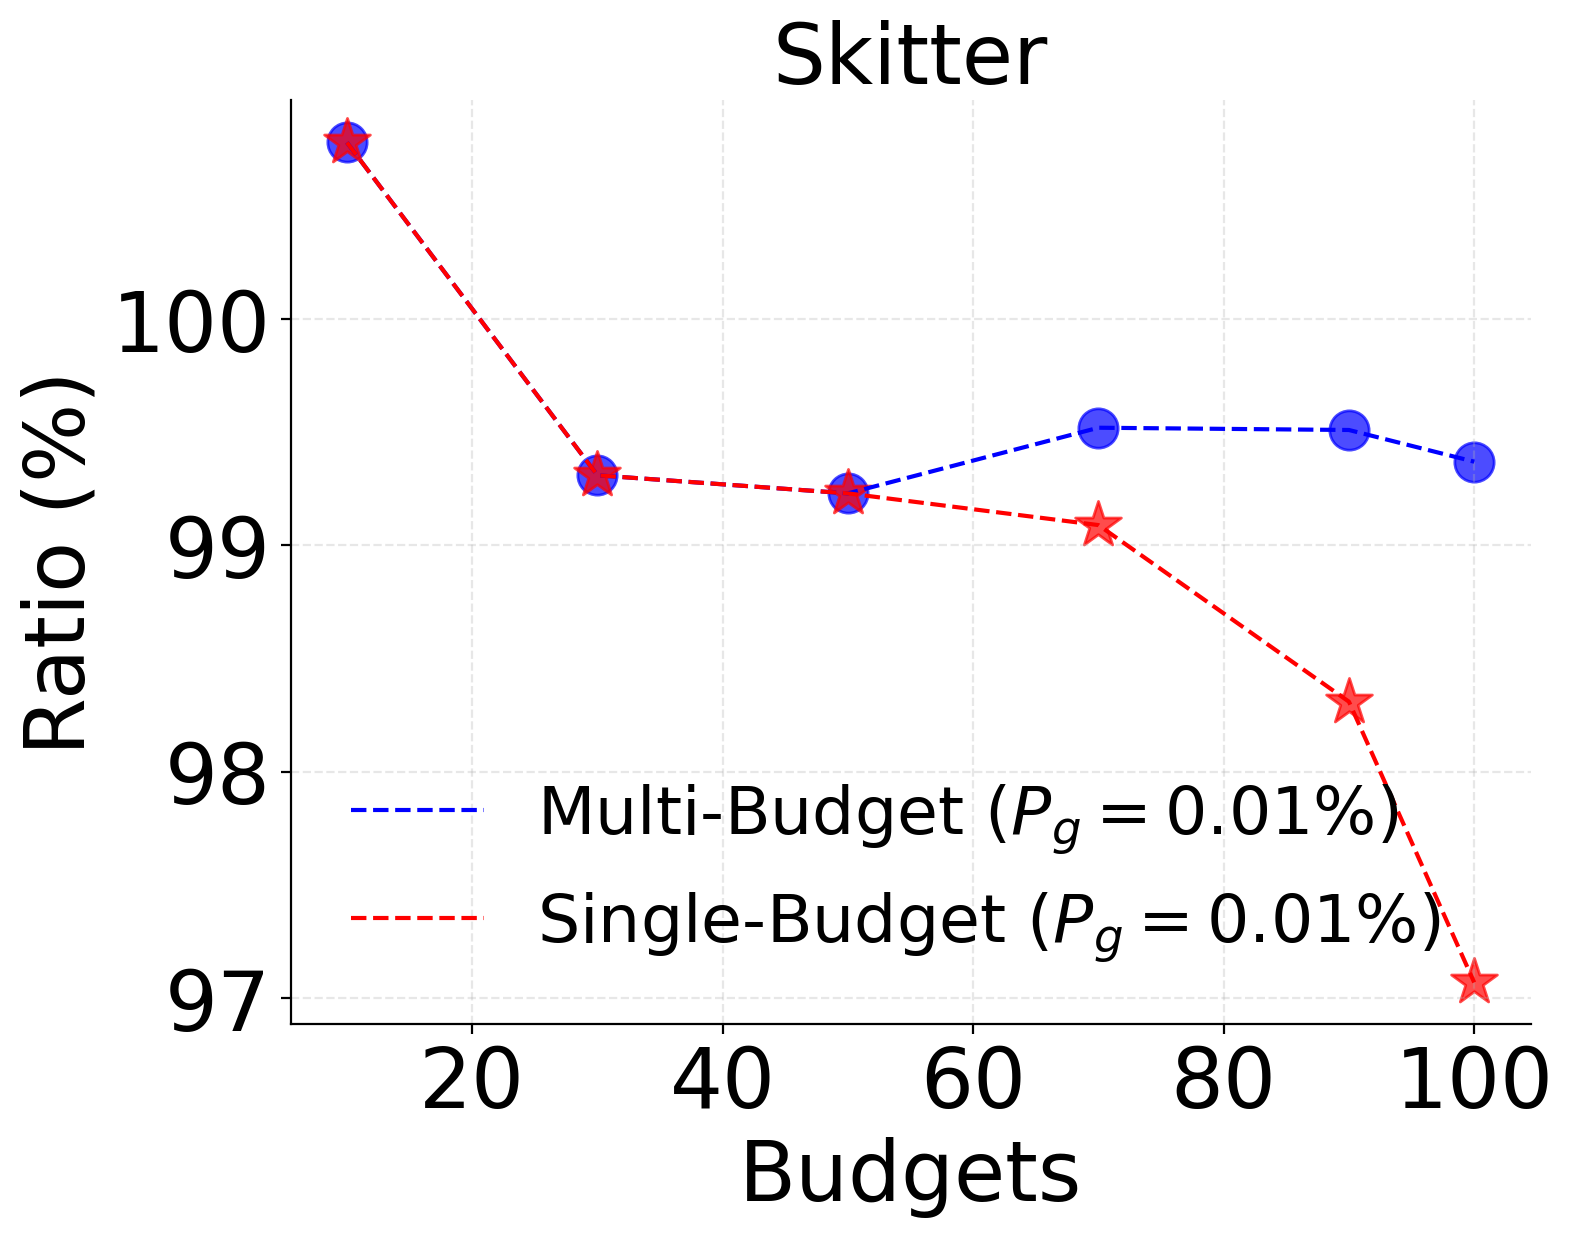

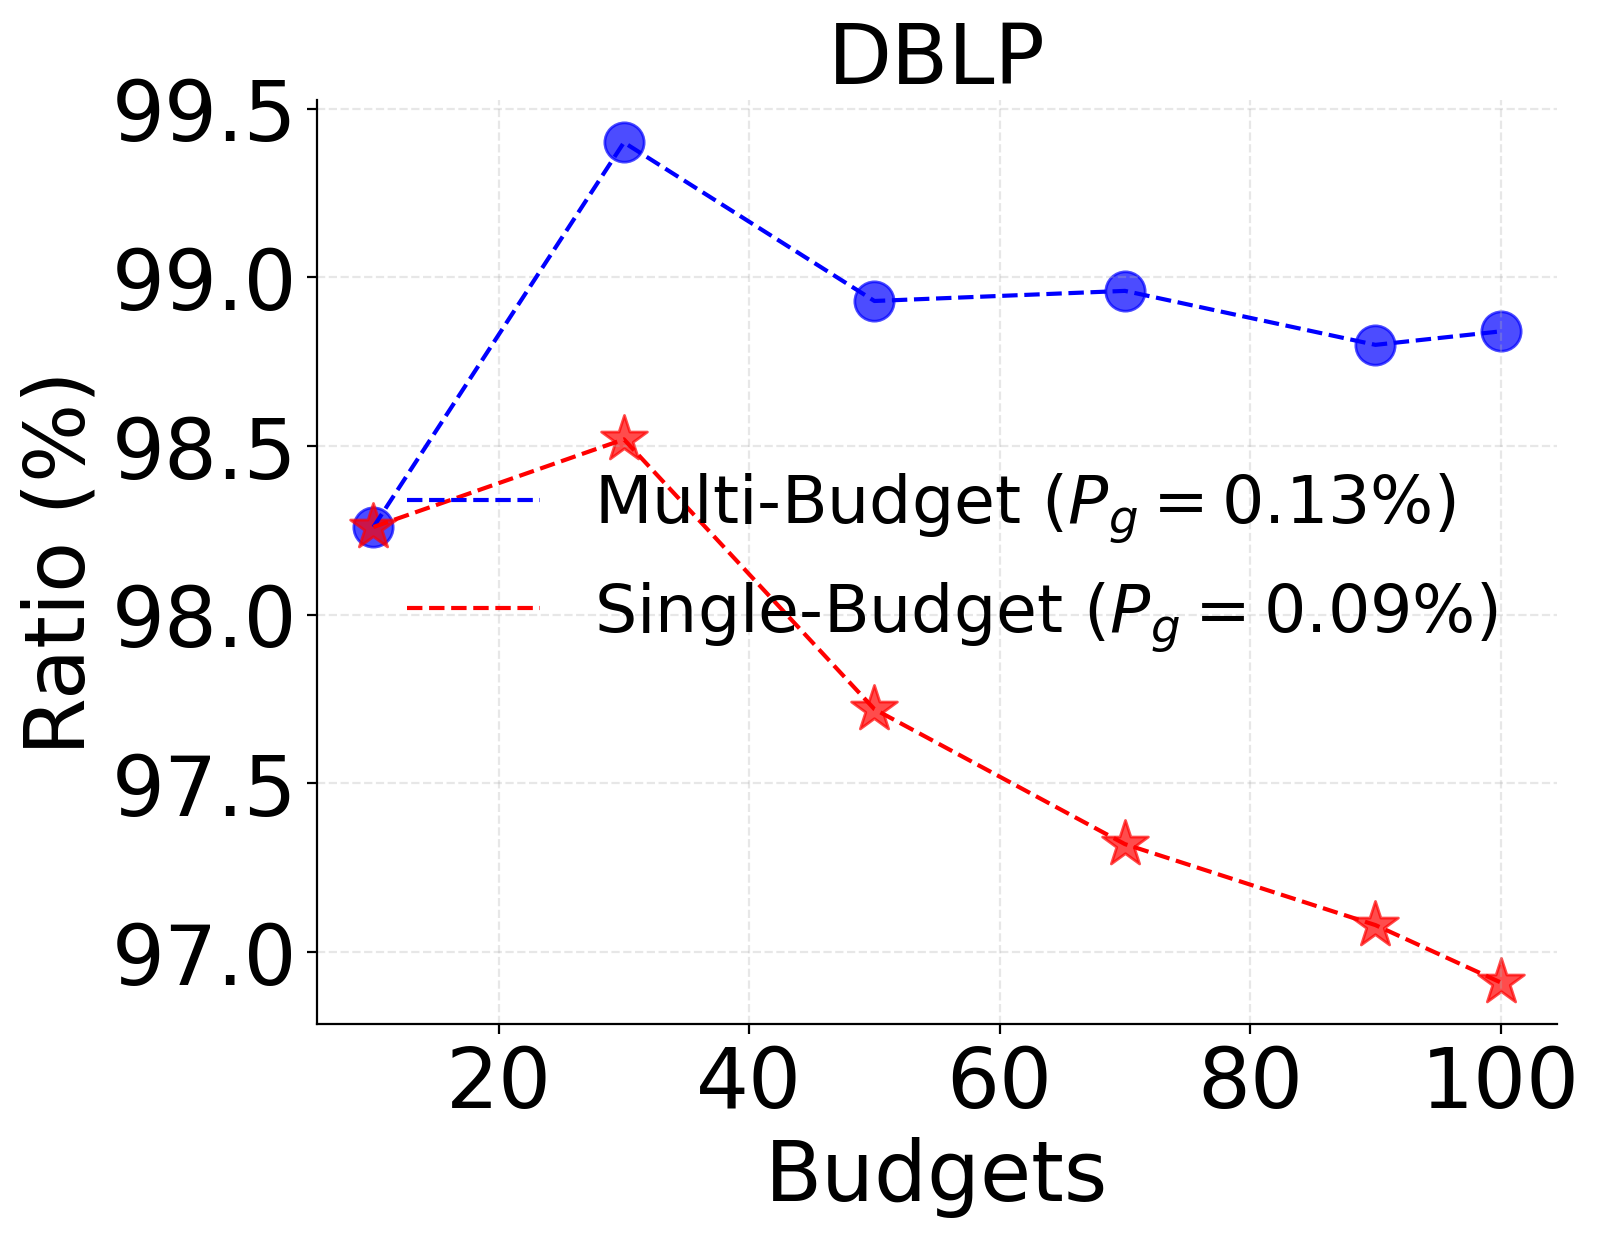

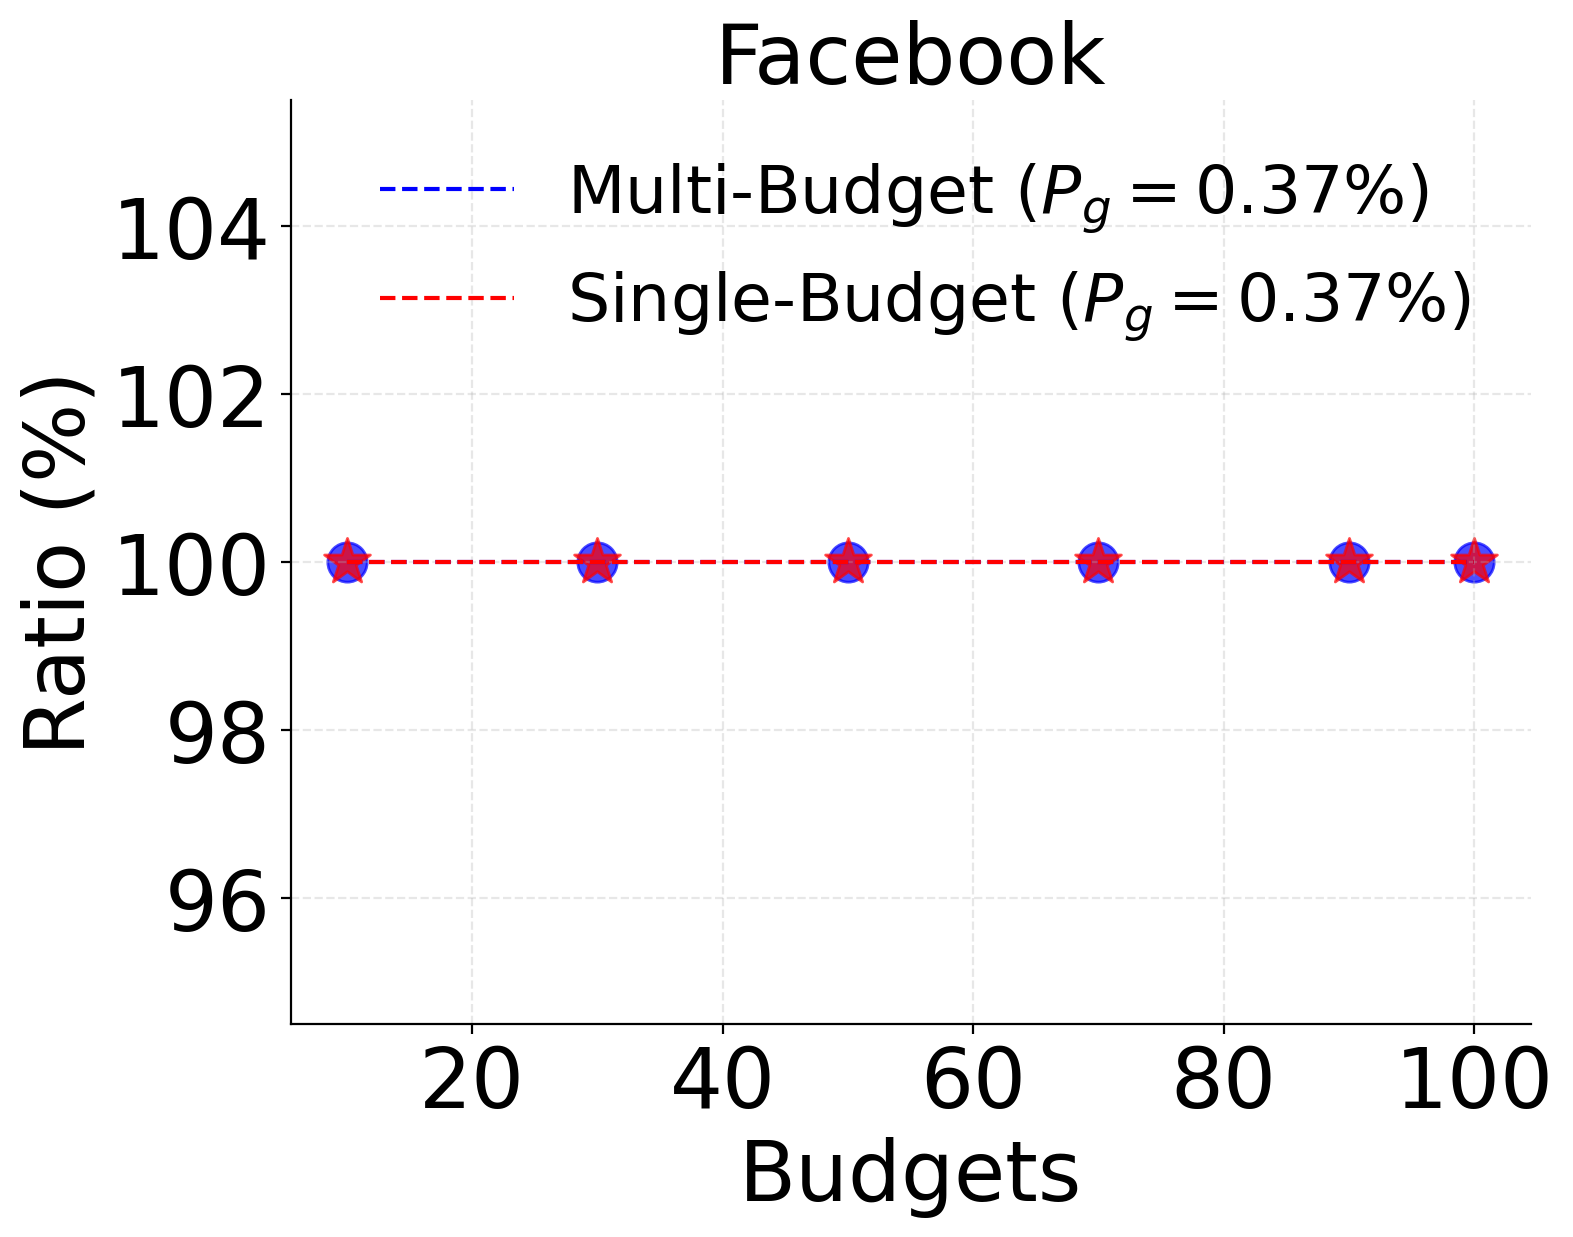

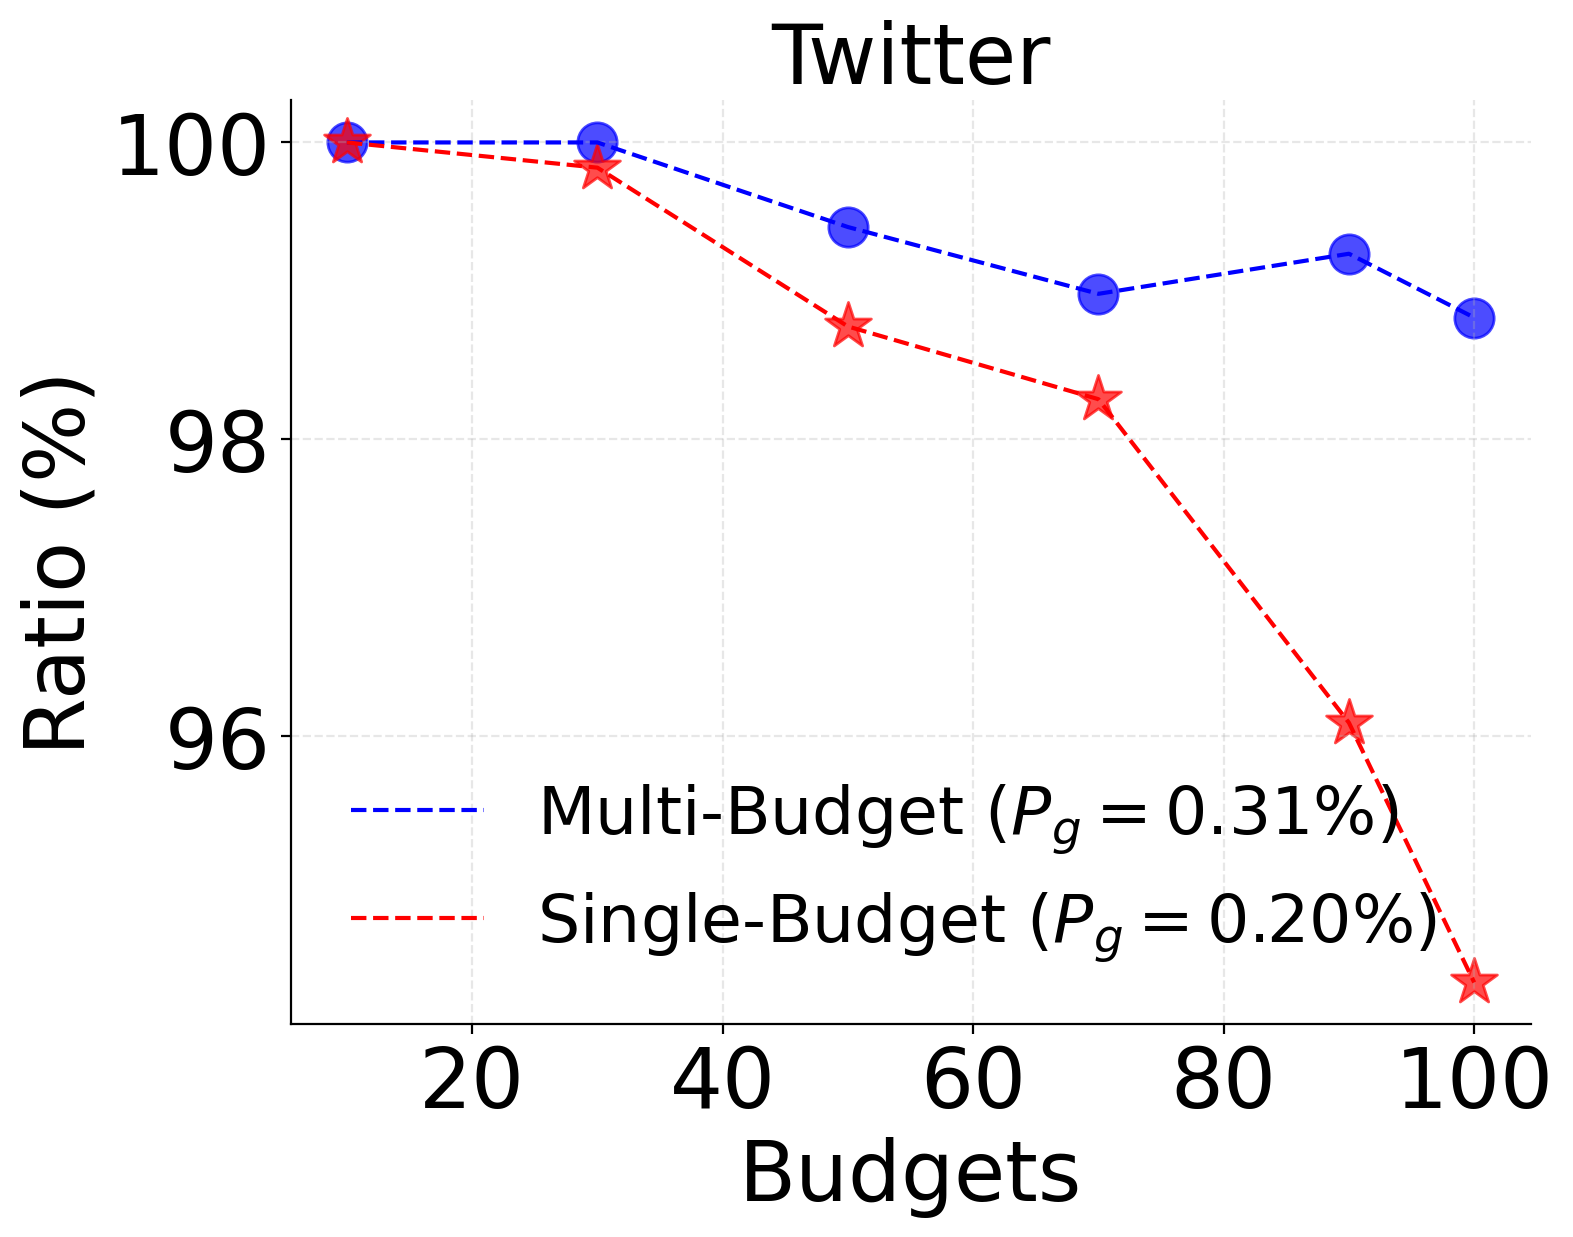

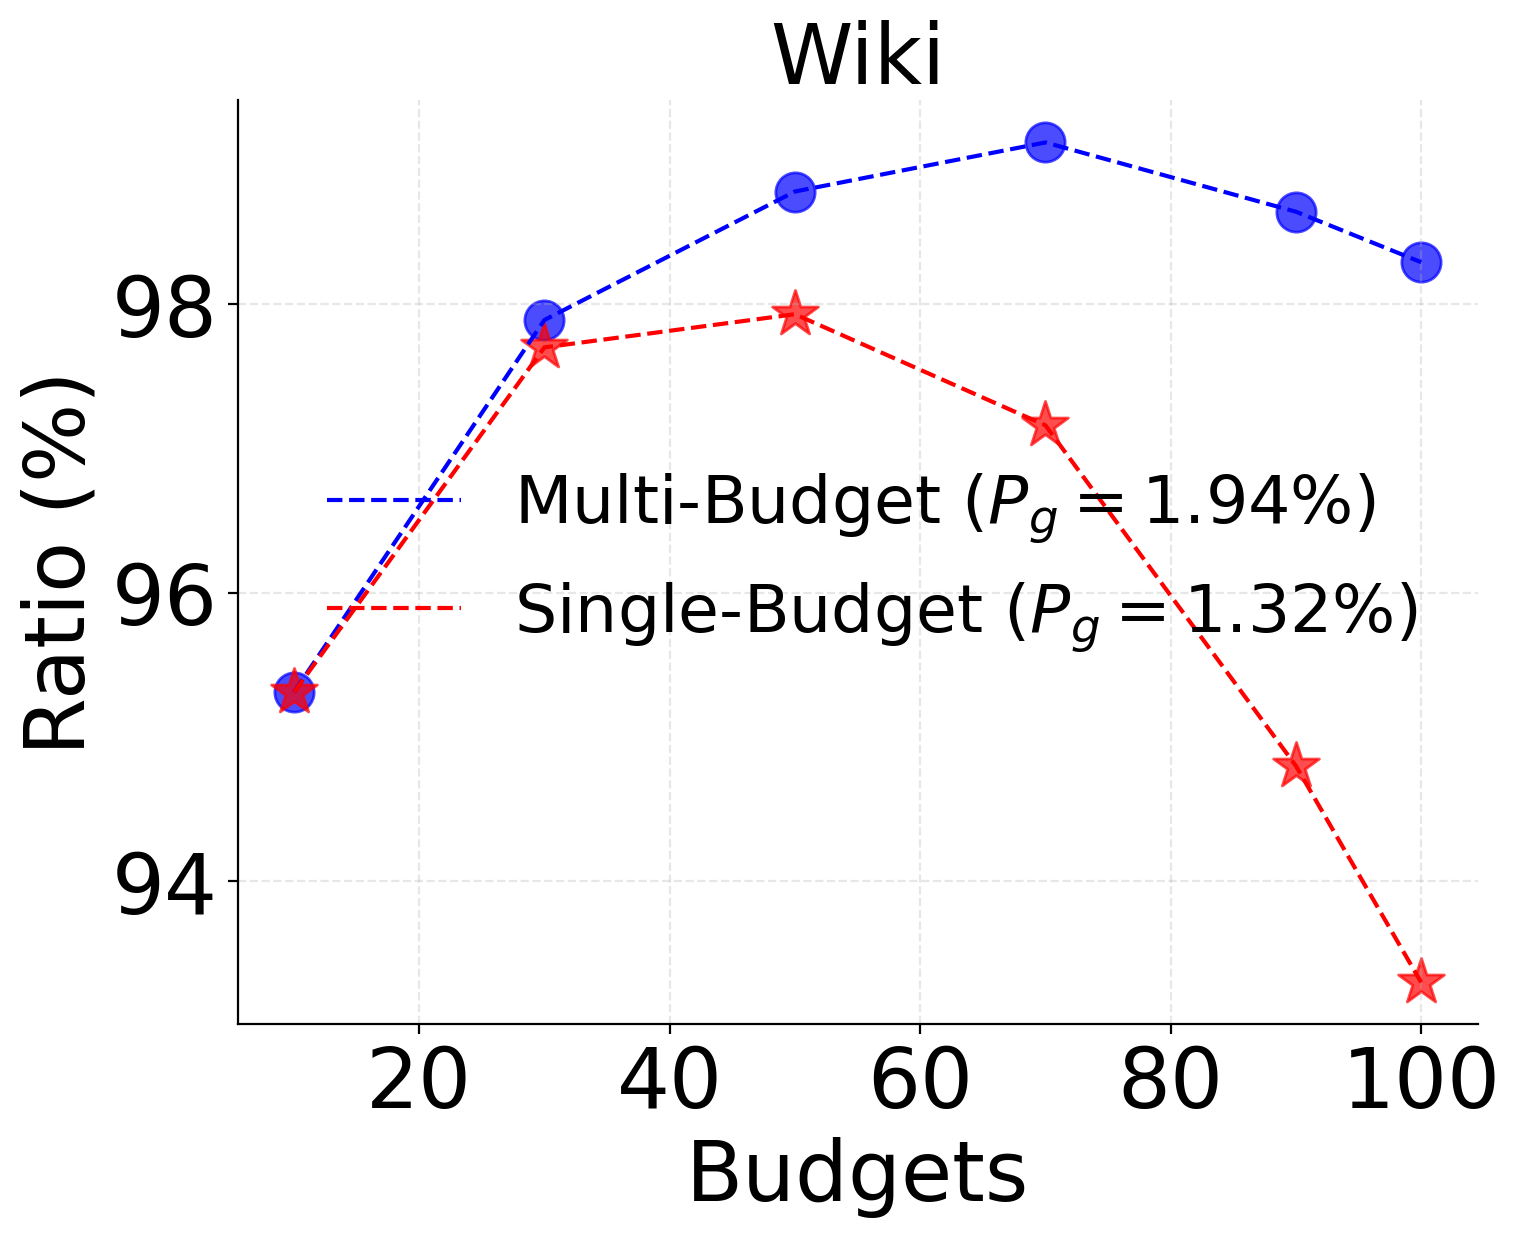

In [74]:

for problem in [
                'MaxCover',
                # 'MaxCut'
              ]:
    image_folder = f'{problem}/figures'
    os.makedirs(image_folder,exist_ok=True)
    root_folder=os.path.join(problem,'data')
    # datasets=['Facebook','DBLP','Skitter','YouTube']
    for folder in [
                    # 'knapsack',
                    'knapsack_multi'
                    ]:
        datasets=os.listdir(root_folder)

        
        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df =defaultdict(list)

        for dataset in datasets:

            # print('*'*20)
            # print(dataset)
            dataset_path = os.path.join(root_folder,dataset)
            try:
                # print(os.path.join(dataset_path,folder,'Quickfilter_degree'))
                # df_ = load_from_pickle(os.path.join(dataset_path,folder,'GNNpruner'))
                df_ = load_from_pickle(os.path.join(dataset_path,folder,'Quickfilter_degree'))
                print(folder,df_['Dataset'].iloc[0])
                # df['dataset'].append(dataset)
                # # df['algorithm'].append('QS')
                # # df['Delta'].append(df_['Delta'].iloc[0])
                # df['Size of Ground Set'].append(df_['Pruned Ground set(%)'].iloc[0])
                
                # df['Ratio'].append(df_['Ratio(%)'].iloc[0])
                # # df['Queries'].append(df_['Queries(%)'].iloc[0])
                plt.figure(dpi=200, figsize=(8,6))

                # Scatter for Multi-Budget
                plt.scatter(df_['Budget'], df_['Ratio Multi'], marker='o', s=200, color='blue', alpha=0.7)
                plt.plot(df_['Budget'], df_['Ratio Multi'], linestyle='--', color='blue', 
                        label=f"Multi-Budget $(P_g={df_['Pruned Ground set Multi(%)'].iloc[0]:.2f}\%)$")

                # Scatter for Single-Budget
                plt.scatter(df_['Budget'], df_['Ratio Single'], marker='*', s=300, color='red', alpha=0.7)
                plt.plot(df_['Budget'], df_['Ratio Single'], linestyle='--',color='red', 
                        label=f"Single-Budget $(P_g ={df_['Pruned Ground set Single(%)'].iloc[0]:.2f}\%)$")


                fontsize = 30
                # Adding grid, legend, and style
                plt.grid(alpha=0.3, linestyle='--')
                sns.despine()
                plt.legend(frameon = False,fontsize = fontsize-6)
                plt.title(df_['Dataset'].iloc[0],fontsize = fontsize)
                plt.xlabel('Budgets', fontsize=fontsize )
                plt.ylabel('Ratio (%)', fontsize=fontsize)
                plt.xticks(fontsize=fontsize )
                plt.yticks(fontsize=fontsize )
                plt.locator_params(nbins=6)
                
                file_name = os.path.join(image_folder,df_['Dataset'].iloc[0])
                
                # plt.savefig(f'{file_name}', bbox_inches='tight')
                plt.savefig(f'{file_name}.pdf', bbox_inches='tight',dpi=300)
                # plt.close()
            except:
                pass
                
        # # print(df)
        # df = pd.DataFrame(df)
        # print(df)
        # # print('-'*20)


In [59]:
datasets

['Slashdot',
 'YouTube',
 'web-Google',
 'Deezer',
 'Skitter',
 'DBLP',
 'Facebook',
 'Twitter',
 'Wiki']

In [58]:
df_

,Dataset,Budget,Delta,Objective Value(Unpruned),Objective Value Multi(Pruned),Objective Value Single(Pruned),Ground Set,Ground set Multi (Pruned),Ground set Single (Pruned),Time(Unpruned),...,Pruned Ground set Multi(%),Pruned Ground set Single(%),Ratio Multi,Ratio Single,Queries Multi(%),Queries Single(%),TimeRatio(Multi),TimeRatio(Single),TimeToPrune(Multi),TimeToPrune(Single)
0,Slashdot,10,0.5,8096,8096,8096,77350,183,124,13.288986,...,0.24,0.16,100.00,100.00,0,0,0.143711,0.075760,0.549135,0.116202
1,Slashdot,30,0.5,14369,14369,14369,77350,183,124,13.842011,...,0.24,0.16,100.00,100.00,0,0,0.083402,0.070669,0.549135,0.116202
2,Slashdot,50,0.5,17733,17733,17703,77350,183,124,13.973258,...,0.24,0.16,100.00,99.83,0,0,0.070511,0.083009,0.549135,0.116202
3,Slashdot,70,0.5,20080,20071,19821,77350,183,124,14.244820,...,0.24,0.16,99.96,98.71,0,0,0.078638,0.081160,0.549135,0.116202
4,Slashdot,90,0.5,22003,21973,21187,77350,183,124,14.470933,...,0.24,0.16,99.86,96.29,0,0,0.078000,0.066335,0.549135,0.116202
5,Slashdot,100,0.5,22844,22669,21607,77350,183,124,14.303778,...,0.24,0.16,99.23,94.59,0,0,0.080086,0.082355,0.549135,0.116202


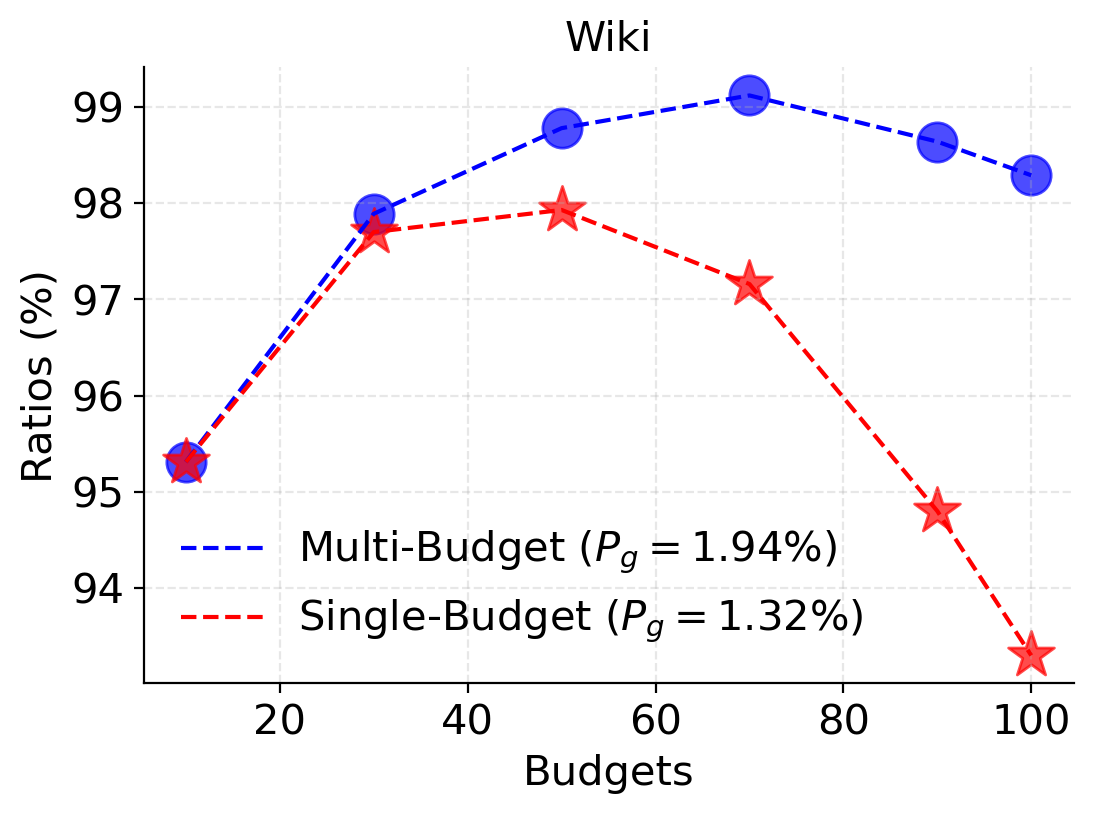

In [52]:
plt.figure(dpi=200, figsize=(6,4))

# Scatter for Multi-Budget
plt.scatter(df_['Budget'], df_['Ratio Multi'], marker='o', s=200, color='blue', alpha=0.7)
plt.plot(df_['Budget'], df_['Ratio Multi'], linestyle='--', color='blue', 
         label=f"Multi-Budget $(P_g={df_['Pruned Ground set Multi(%)'].iloc[0]:.2f}\%)$")

# Scatter for Single-Budget
plt.scatter(df_['Budget'], df_['Ratio Single'], marker='*', s=300, color='red', alpha=0.7)
plt.plot(df_['Budget'], df_['Ratio Single'], linestyle='--',color='red', 
         label=f"Single-Budget $(P_g ={df_['Pruned Ground set Single(%)'].iloc[0]:.2f}\%)$")


fontsize = 15
# Adding grid, legend, and style
plt.grid(alpha=0.3, linestyle='--')
plt.legend(frameon = False,fontsize = fontsize)
plt.title(df_['Dataset'].iloc[0],fontsize = fontsize)
plt.xlabel('Budgets', fontsize=fontsize )
plt.ylabel('Ratios (%)', fontsize=fontsize)
plt.xticks(fontsize=fontsize )
plt.yticks(fontsize=fontsize )
folder = f'{problem}/figures'
os.makedirs(folder,exist_ok=True)
file_name = os.path.join(folder,df_['Dataset'].iloc[0])
sns.despine()
plt.savefig(f'{file_name}', bbox_inches='tight')
plt.savefig(f'{file_name}.pdf', bbox_inches='tight')



In [15]:
df_

,Dataset,Budget,Delta,Objective Value(Unpruned),Objective Value Multi(Pruned),Objective Value Single(Pruned),Ground Set,Ground set Multi (Pruned),Ground set Single (Pruned),Time(Unpruned),...,Pruned Ground set Multi(%),Pruned Ground set Single(%),Ratio Multi,Ratio Single,Queries Multi(%),Queries Single(%),TimeRatio(Multi),TimeRatio(Single),TimeToPrune(Multi),TimeToPrune(Single)
0,Wiki,10,0.5,2261,2155,2155,7115,138,94,0.154335,...,1.94,1.32,95.31,95.31,0,0,4.481737,0.702732,0.082561,0.017324
1,Wiki,30,0.5,3267,3198,3192,7115,138,94,0.150400,...,1.94,1.32,97.89,97.70,0,0,0.678952,1.094235,0.082561,0.017324
2,Wiki,50,0.5,3761,3715,3683,7115,138,94,0.146073,...,1.94,1.32,98.78,97.93,0,0,0.693580,0.685016,0.082561,0.017324
3,Wiki,70,0.5,4080,4044,3964,7115,138,94,0.147498,...,1.94,1.32,99.12,97.16,0,0,0.681131,1.070987,0.082561,0.017324
4,Wiki,90,0.5,4330,4271,4105,7115,138,94,0.148459,...,1.94,1.32,98.64,94.80,0,0,0.684811,0.695786,0.082561,0.017324
5,Wiki,100,0.5,4433,4357,4136,7115,138,94,0.148090,...,1.94,1.32,98.29,93.30,0,0,1.001702,0.676540,0.082561,0.017324


In [6]:
Ground_set = {
    'Facebook': 3398,
    'Wiki': 6349,
    'Deezer': 53555,
    'Slashdot':67677,
    'Twitter': 80779,
    'DBLP':314818,
    'YouTube':1094439,
    'Skitter': 1694024

}

data_MVC_Lense = {
    'Facebook': 300,
    'Wiki': 300,
    'Deezer': 500,
    'Slashdot': 500,
    'Twitter': 1000,
    'DBLP': 1000,
    'YouTube': 1250,
    'Skitter': 750
}

data_IM_Lense = {
    'Facebook': 300,
    'Wiki': 300,
    'Deezer': 500,
    'Slashdot': 500,
    'Twitter': 1000,
    'DBLP': 1000,
    'YouTube': 750,
    'Skitter': 750
}


for key in data_MVC_Lense:
    print(key,data_MVC_Lense[key]/Ground_set[key])


for key in data_MVC_Lense:
    print(key,data_MVC_Lense[key]/Ground_set[key])

Facebook 0.08828722778104768
Wiki 0.04725153567490943
Deezer 0.009336196433572962
Slashdot 0.00738803433958361
Twitter 0.012379455056388418
DBLP 0.0031764384501521514
YouTube 0.001142137661395473
Skitter 0.00044273280661903257


In [ ]:
for problem in [
                'MaxCover',

              ]:
    root_folder=os.path.join(problem,'data')
    
    
    datasets=os.listdir(root_folder)
    # print(datasets)

    for dataset in datasets:
        
        print('*'*20)
        print(dataset)
        dataset_path = os.path.join(root_folder,dataset)
        algorthims = os.listdir(dataset_path)

        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df = defaultdict(list)
        # for algorthim in ['Quickfilter','SS','LeNSE','CombHelperTeacher','CombHelperStudent','GNNpruner']:
        for algorthim in ['Quickfilter','SS','LeNSE','CombHelperStudent','GNNpruner']:
          try:
            df_ = load_from_pickle(os.path.join(dataset_path,algorthim))

            # columns =['Ground set(Pruned)','Ratio(%)','Queries(%)']
            df['algorithm'].append(algorthim)
            df['Size of Ground Set'].append(df_['Pruned Ground set(%)'].iloc[0])
            df['Ratio'].append(df_['Ratio(%)'].iloc[0])
            # df['Objective Value(Unpruned)'].append(df_['Objective Value(Unpruned)'].iloc[0])
            # df['Objective Value(Pruned)'].append(df_['Objective Value(Pruned)'].iloc[0])
            # df['Queries'].append(df_['Queries(%)'].iloc[0].zfill(4))
            # df['Queries'].append(df_['Queries(%)'].iloc[0])
          except:
            pass
      # print(df)
        df = pd.DataFrame(df)
        # df['Queries'] = df['Queries'].apply(lambda x: f"{x:.4f}")
        df['Size of Ground Set']=df['Size of Ground Set'].round(4)
        # df['Queries'] = df['Queries'].round(4)
        print(df)
        print('-'*20)
